In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("SarawakDataset/predictions.csv")

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   latitude   longitude  year      predicted_label
0  1.099127  111.229458  2017           Plantation
1  1.520886  110.841117  2018                Other
2  3.700289  114.610807  2017           Plantation
3  2.722562  114.817509  2018           Plantation
4  3.517302  114.027082  2017  Grassland shrubland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         140 non-null    float64
 1   longitude        140 non-null    float64
 2   year             140 non-null    int64  
 3   predicted_label  140 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ KB
None


## 1. Distribution of Predicted Labels

C:\Users\Yoga 6 R5\AppData\Local\Temp\ipykernel_50916\3031659580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


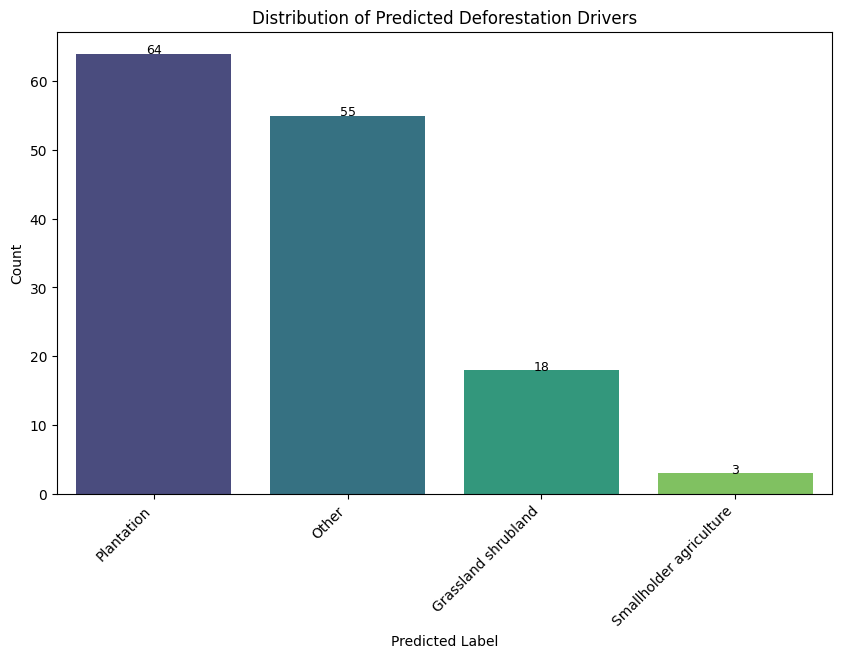

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="predicted_label",
    order=df["predicted_label"].value_counts().index,
    palette="viridis",
)

# Add the exact count on top of each bar
for patch in plt.gca().patches:
    plt.gca().annotate(
        f"{int(patch.get_height())}",
        (patch.get_x() + patch.get_width() / 2, patch.get_height() - 1),
        ha="center",
        va="baseline",
        fontsize=9,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.title("Distribution of Predicted Deforestation Drivers")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.show()

## 2. Temporal Analysis of Predictions

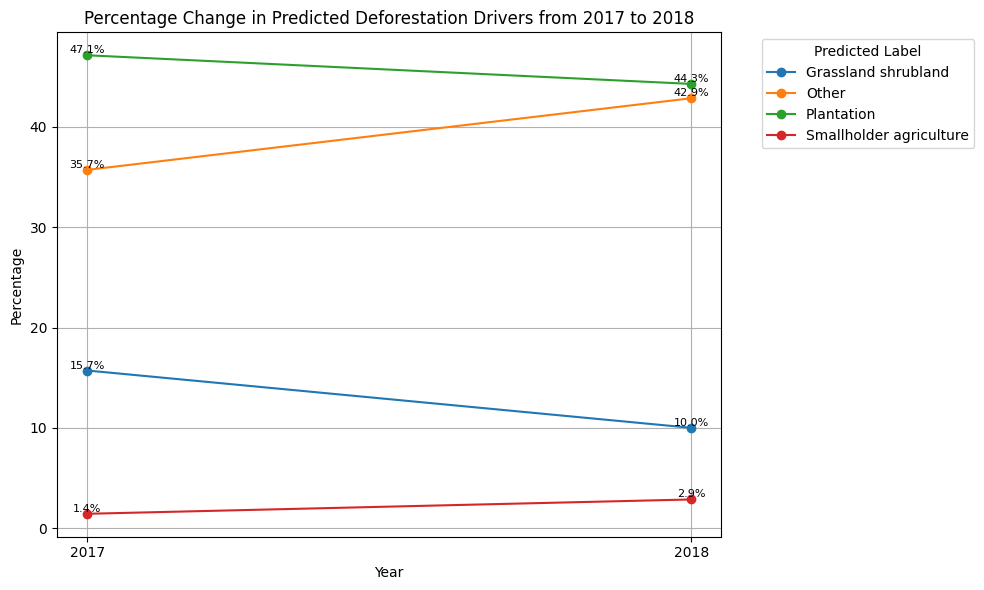

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for the line chart
df_counts = df.groupby(["year", "predicted_label"]).size().unstack(fill_value=0)

# Calculate the percentage of each label per year
df_percentage = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

# Plot the line chart
plt.figure(figsize=(10, 6))
for label in df_percentage.columns:
    plt.plot(df_percentage.index, df_percentage[label], marker="o", label=label)

    # Annotate with percentage change
    for year in df_percentage.index:
        percentage = df_percentage.at[year, label]
        plt.text(
            year, percentage, f"{percentage:.1f}%", ha="center", va="bottom", fontsize=8
        )

plt.title("Percentage Change in Predicted Deforestation Drivers from 2017 to 2018")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.xticks(df_percentage.index)
plt.legend(title="Predicted Label", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Spatial Distribution of Predictions

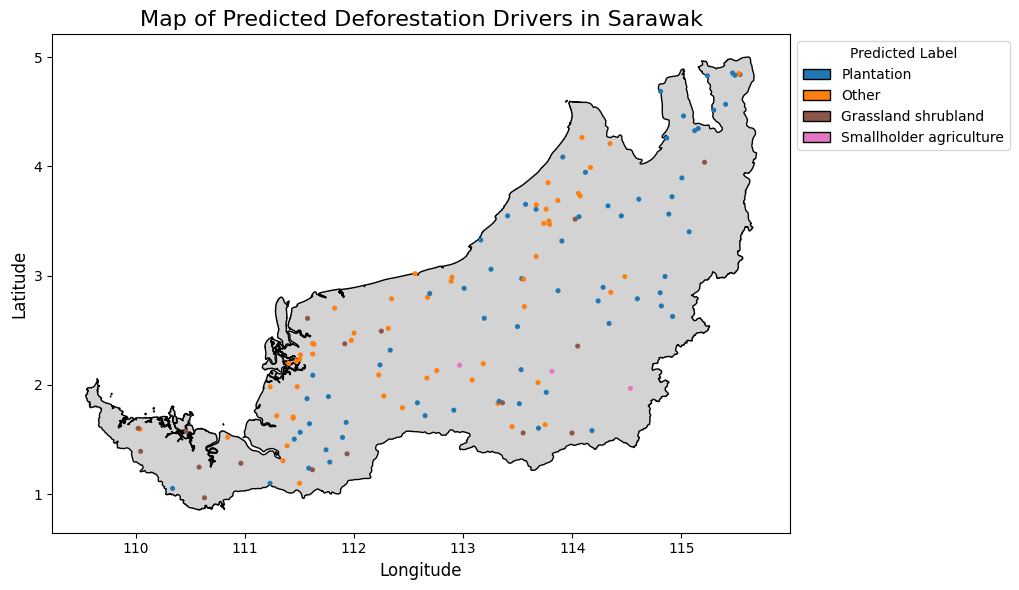

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Load the Sarawak shapefile
sarawak = gpd.read_file("SarawakDataset/Shapefiles/SARAWAK.shp")

# Convert the dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# coordinate reference system
sarawak = sarawak.to_crs(gdf.crs)

# Convert latitude and longitude to float
df["latitude"] = df["latitude"].astype(float)
df["longitude"] = df["longitude"].astype(float)

# Create a custom colormap with distinct colors
distinct_colors = [
    "#1f77b4",  
    "#ff7f0e",  
    "#8c564b",  
    "#e377c2",  
]

# Create the map
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Sarawak
sarawak.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot the points
scatter = ax.scatter(
    gdf.geometry.x,
    gdf.geometry.y,
    c=pd.factorize(gdf["predicted_label"])[0],
    cmap=cmap,
    alpha=1,
    s=7,
)

# Customize the legend
handles = [
    Patch(facecolor=distinct_colors[i], edgecolor="black", label=label)
    for i, label in enumerate(df["predicted_label"].unique())
]
ax.legend(
    handles=handles, title="Predicted Label", loc="upper left", bbox_to_anchor=(1, 1)
)

# Set the title and labels
plt.title("Map of Predicted Deforestation Drivers in Sarawak", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()